In [509]:
import experiment
import models

from experiment import *

In [510]:
sim = Exp()
concs = np.geomspace(0.1, 100, 10)
concs = [c*0.1e-6 for c in concs]

start = 0
stop = 10000
for c in concs:
    sim.add_dataset(np.linspace(start,stop*2,stop), np.linspace(start,stop*2,stop))
    sim.datasets[-1].add_step(start, stop, c)
    sim.datasets[-1].add_step(stop, stop*2, 0)



In [511]:
sim.model = models.Bivalent_analyte()
try:
    sim.model.params_definitions['ymax1'].user_data['type']='global'
    sim.model.params_definitions['ymax2'].user_data['type']='global'
except:
    sim.model.params_definitions['ymax'].user_data['type']='global'
sim.create_params()


In [512]:
sim.params['ka1'].value =   12985.5994	
sim.params['kd1'].value = 	0.03432055
sim.params['ka2'].value =	0.01974791	
sim.params['kd2'].value =	3.3477e-04
try:
    sim.params['ymax'].value = 1.48838347
except:
    sim.params['ymax1'].value = 1
    sim.params['ymax2'].value = 0.2

#ymax = sim.params['ymax'].value

In [513]:
sim.params

name,value,initial value,min,max,vary
ka1,12985.5994,10000.0,10.0000000,1.0000e+08,True
kd1,0.03432055,0.01,1.0000e-06,0.10000000,True
ka2,0.01974791,0.01,1.0000e-07,10000000.0,True
kd2,3.3477e-04,0.01,1.0000e-07,10000000.0,True
ymax,1.48838347,1,0.00000000,1000.00000,True


In [514]:
print(8.24753857828252e-06)
0.03867410/ 4689.16873	

8.24753857828252e-06


8.247538578122352e-06

In [515]:
sim.simulate_response(None, 0, 0)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

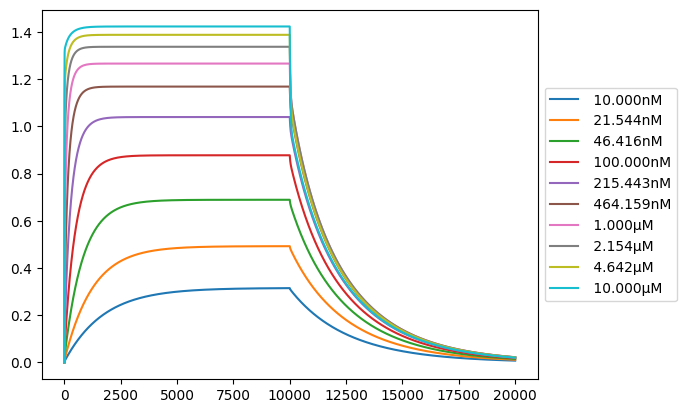

In [516]:
sim.plot()

In [490]:
xs = []
ys = []
for ds in sim:
    xs.append(ds.steps[0].concentration)
    t = ds.t>=ds.steps[0].stop
    y = ds.response[t][0]
    ys.append(y)


[6.44270351e-08]
R² = 0.9268385919756615


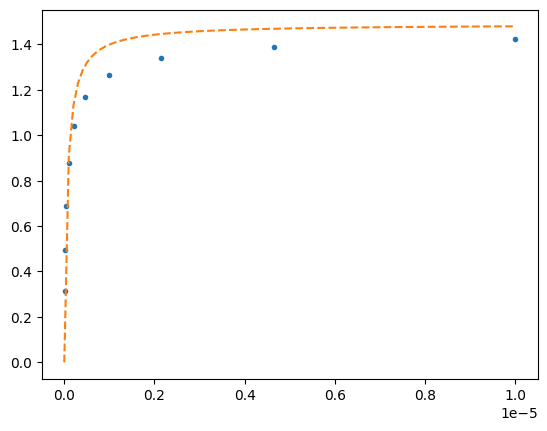

In [491]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt

xs = np.array(xs)
ys = np.array(ys)

xs_fitted = np.linspace(0, xs[-1], num=100)

def func(x, Kd):
    return ymax*x/(Kd+x)

p0 = (1e-6)

params, cv = scipy.optimize.curve_fit(func, xs, ys, p0)
print(params)
# perform the fit
Kd = params[0]


# determine quality of the fit
squaredDiffs = np.square(ys - func(xs, Kd))
squaredDiffsFromMean = np.square(ys - np.mean(ys))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")

# plot the results
plt.plot(xs, ys, '.', label="data")
plt.plot(xs_fitted, func(xs_fitted, Kd), '--', label="fitted")
# plt.title(f"Y = {Rmax:.2f} * e^(-{Kd:.2f} * t)")

# inspect the parameters


plt.show()


1e-08 0.315014783252366
1.5000000000000002e-08 0.4047973522660706
2e-08 0.47419441058139683
2.5e-08 0.5302341288405504
3e-08 0.5769026634098108
3.4999999999999996e-08 0.616663218840554
3.9999999999999994e-08 0.6511386940476671
4.499999999999999e-08 0.6814522342810954
4.999999999999999e-08 0.7084117717185632
5.499999999999999e-08 0.7326168714393044
6e-08 0.7545240054521911
5.749999999999999e-08 0.7438334923717371
6e-08 0.7545240054521911
5.8749999999999993e-08 0.7492418027939345
5.812499999999999e-08 0.7465537371454679
5.7812499999999996e-08 0.7451976789751104
5.765625e-08 0.7445166070242518
5.7578125e-08 0.7441753057021415
5.765625e-08 0.7445166070242518
5.76171875e-08 0.7443460202807353
5.7597656249999994e-08 0.7442606789812448
5.758789062499999e-08 0.7442179963404526
5.7583007812499995e-08 0.744196652021147
5.758056640625e-08 0.7441859791116296
5.7583007812499995e-08 0.744196652021147
5.7581787109374996e-08 0.7441913156288804
5.7583007812499995e-08 0.744196652021147
5.758239746093749

(<Figure size 640x480 with 1 Axes>, <Axes: >)

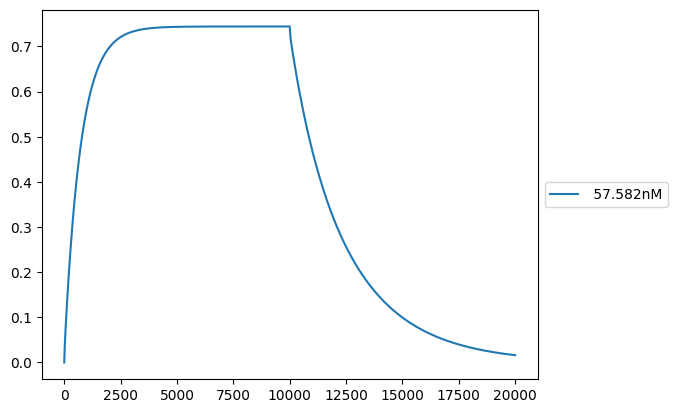

In [492]:
c=concs[0]
t = sim.datasets[0].t<=sim.datasets[0].steps[0].stop
start = sim.datasets[0].steps[0].start
stop = sim.datasets[0].steps[0].stop
diff = c/2
ymax = sim.params['ymax'].value

for i in range(100):
    temp = Exp()
    temp.model = sim.model
    temp.params = sim.params
    temp.add_dataset(np.linspace(start,stop*2,stop), np.linspace(start,stop*2,stop))
    temp.datasets[-1].add_step(start, stop, c)
    temp.datasets[-1].add_step(stop, stop*2, 0)
    temp.simulate_response(None, 0, 0)
    y = temp.datasets[0].response[t][-1]
    print(c, y)
    
    if y<ymax/2:
        c=c+diff
    else:
        c=c-diff/2
        diff = diff/2

temp.plot()

In [493]:
t = sim.datasets[0].t<=sim.datasets[0].steps[0].stop
sim.datasets[0].response[t][-1]


0.315014783252366

In [494]:
ds.response[t][0]

0.0

In [188]:
start = 0
stop = 100000
for c in concs:
    sim.add_dataset(np.linspace(start,stop,stop), np.linspace(1000,2000,1000))
    sim.datasets[-1].add_step(start, stop-1000, c)
    sim.datasets[-1].add_step(stop-1000, stop, 0)